In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf # welcome!!
from sklearn.linear_model import LinearRegression

import pandas as pd
np.random.seed(123)

# Take-home exercises

Using a dataset, try this hands-on exercise:

0. First, review what we've seen!

1. Load the data using pandas: `pd.read_csv('../datasets/Advertising.csv')`

2. Do a pairplot to investigate any correlations

3. Check your intuitions with the `.corr()` function of your dataset

4. Create a simple linear model using `scikit`'s `LinearRegression`

5. Create the same model using the library `statsmodels.formula.api` or the 

### Hands on exercise!

Remember to correctly load the data in your notebook!

In [ ]:
df_adv = pd.read_csv('../data/Advertising.csv')

* Create three independent simple linear regression models
    * Interpret the results
**Note** pay special attention to the significance of the `Newspaper variable`.

## Multiple linear regression

Of course, the hours one studies is not the only important factor to get good grades. We can think of IQ, for example, as another determining factor. In fact, we can generalize a linear model to have as many variables as we want:

 $$ Y = \beta_0 +  \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m   + \epsilon$$


In [ ]:
# We generate data following the linear population model
# but now we have more than one X!

# Why do we do this? Because we assume relationships in the data are linear,
# and this is a way of obtaining data with that assumption.

# In real life, we won't know the true relationships in the data,
# but plotting the variables can show us that there might be some
# linear relationships that we can exploit.

num_points = 100

beta_0 = 11.75
beta_1 = 0.08     # hours of study
beta_2 = -0.03    # party hours

X_1 = np.random.normal(500, 200, num_points)
X_2 = np.random.normal(500, 200, num_points)

y = (beta_0) + (beta_1 * X_1) + (beta_2 * X_2)  + (np.random.normal(loc=0,scale=5,size=num_points))

In [ ]:
data = pd.DataFrame({'grades': y, 
                     'study_hours': X_1,
                     'party_hours': X_2})

The coefficients of the multiple linear regression are computed similarly to the simple linear regression case. They minimize:

$$RSS = \Sigma(y_i - \hat{y_i})^2$$


where:

 $$ \hat{y} = \hat{\beta_0} +  \hat{\beta_1} X_1 + \hat{\beta_2} X_2 + \dots + \hat{\beta_2} X_m$$


In [ ]:
# Create plot
study_hours = np.arange(0,1000)  # limits of my plot (~ variables)
party_hours = np.arange(0,1000)  # limits of my plot (~ variables)

B1, B2 = np.meshgrid(study_hours, party_hours, indexing='xy')
Z = np.zeros((study_hours.size, party_hours.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =(beta_0 + B1[i,j]*beta_1 + B2[i,j]*beta_2)

fig = plt.figure()
fig.suptitle('Regression: grade ~ study_hours + party_hours', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, cmap='rainbow', alpha=1)
ax.scatter3D(X_1, X_2, y , c='r', s=50)

ax.set_xlabel('study_hours')
ax.set_xlim(0, 1000)
ax.set_ylabel('party_hours')
ax.set_ylim(0, 1000)
ax.set_zlabel('grades');

# Advertising example

See * [Introduction to Statistical Learning (Chapter 3)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf) section 3.2.1 to make sense of this result!

## Categorical variables

Very often we face situations in which the predictors are *qualitative* in nature. A good example could be the sex of  a person, which can take the vales $M$ or $F$. 

We include this information in the model via a *dummy* variable:
$$
x_i= \left\{
\begin{array}{ll}
      0  \quad \text{if person is female} \\
      1  \quad \text{if person is male} \\
\end{array} 
\right. 
$$

If this is our only variable, this results in a model:

$$y_i = \beta_0 + \beta_1 x_i +\epsilon_i = \left\{
\begin{array}{ll}
      \beta_0 + \beta_1 +\epsilon_i  \quad \text{if i-th person is male} \\
      \beta_0 + \epsilon_i  \quad \text{if i-th person is female} \\
\end{array} 
\right.  $$

In this setting $\beta_0$ represents the average grade among females, and $\beta_0 + \beta_1$ the average grade for males.

# Extensions to the linear model

There are several assumptions that are used when fitting a linear model. Two of them are:
* **Additive assumption** The effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors.
* **Linear assumption** The change in response for a one unit increase in $X_j$ is the same no matter what is the value of $X_j$.


# Challenging the additive assumption: synergy

Sometimes our variables will have natural interactions. For example, we might think that the more our ads are listened in the radio, the more effective our TV ads are. That is, the effect of both is *greater* (or *lesser*) than the sum of the parts.

[This is a commonly studied topic in marketing](https://smallbusiness.chron.com/definition-synergy-marketing-21786.html)

Remember the **Hierarchical principle:**

"*If we include an interaction in a model, we should also include the main effects, even if the p-values associated with their coefficients are not significant*"

**Exercise** [FAKE!]

Imagine there is a theory that states that partying out has more negative effect on males compared to females in terms of grades in the exams. That is, that there is a (negative) *synergetic* effect between both variables. Use the (mock) data to refute of validate this hypothesis.

# Challenging the linear assumption: polynomial regression

# Model selection

### Adjusted $R^2$

There is a funny thing with $R^2$. Look at what happens when we include *Random* variables!!

In [ ]:
df_adv

In [ ]:
df_adv['rand_1'] = np.random.normal(size=200)
df_adv['rand_2'] = np.random.normal(size=200)
df_adv['rand_3'] = np.random.normal(size=200)
df_adv['rand_4'] = np.random.normal(size=200)
df_adv['rand_5'] = np.random.normal(size=200)
df_adv['rand_6'] = np.random.normal(size=200)
df_adv['rand_7'] = np.random.normal(size=200)
df_adv['rand_8'] = np.random.normal(size=200)

In [ ]:
results = smf.ols('Sales ~ TV + Radio + Newspaper + rand_1 + rand_2 + rand_3 + rand_4 + rand_5 + rand_6 + rand_7 + rand_8', 
                  data=df_adv).fit()
results.summary()

The `Adj. R-squared` coefficient is meant to penalize the $R^2$ of a model when including *too many* variables. 
$$\bar R^2 = 1-(1-R^2){n-1 \over n-p-1}$$

There are other statistics to reflect the quality of a model auch as `AIC` ([Akaike Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion)) and the `BIC` ([Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion)) --- did you noticed these names in the results from statsmodels? In both cases, the lowest the better.



## Stepwise selection

One should always aim to have a model as simple as possible! We will study other ways of doing this using **regularization**, but so far the methods we describe here are rather useful!

#### Best subset selection

1. Start with a model with no predictors (just the intercept). This model is $\mathcal{M_0}$ 
2. for $k = 0,1,..., p-1$
    * consider all ${p \choose k}$ models that contain exactly one predictor
    * choose the *best* among these ${p \choose k}$ models, and call it $\mathcal{M_{k+1}}$. Here best is defined as having the smallest $RSS$ of highest $R^2$.
3. Select the single best model among $\mathcal{M_0}, \dots, \mathcal{M_p}$ using either $R_{adj}^2$, $BIC$, or $AIC$.

#### Forward stepwise selection

1. Start with a model with no predictors (just the intercept). This model is $\mathcal{M_0}$ 
2. For $k = 0,1,..., p-1$
    * consider all $p-k$ models that augment the predictors in $\mathcal{M_k}$  with one additional predictor.
    * choose the *best* among these $p-k$ models, and call it $\mathcal{M_{k+1}}$. Here best is defined as having the smallest $RSS$ of highest $R^2$.
3. Select the single best model among $\mathcal{M_0}, \dots, \mathcal{M_p}$ using either $R_{adj}^2$, $BIC$, or $AIC$.

## Potential problems in Linear Regression

The main assumptions of a linear model are:

* Data is linear 
* Errors are not correlated
* Variance of error terms is constant

What if these assumptions are not met? Can we apply a linear regression model and expect to predict good results?

Additionally, our models may suffer from other issues such as:
* Outliers
* High Leverage points
* Collinearity
* Missing values

Watch this [video](https://www.youtube.com/watch?v=hVe2F9krrWk) for an introduction to the topic.
Read section 3.3.3 of the book [Introduction to Statistical Learning](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf).

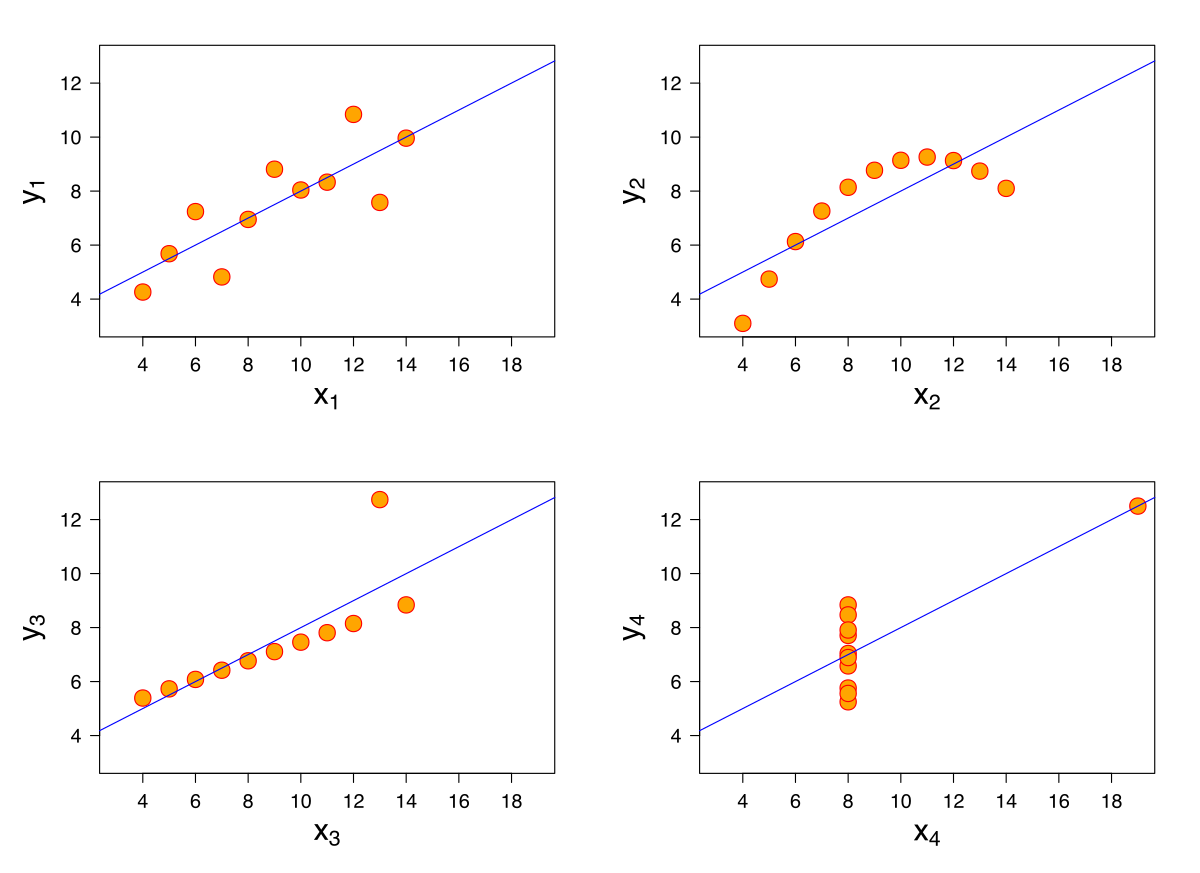

See [Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

# Mini-project

You will be conducting a project next week to predict the prices in the [Boston Houses dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), using everything you have learnt so far about linear regression!

See [repo](https://github.com/agalvezcorell/linear-regression-boston-housing/blob/main/mini-project.ipynb).

# References: 

* [Introduction to Statistical Learning (Chapter 3)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)
* One example of [linear regression with the Boston data set](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)